# Lab 5. Hypothesis testing. Introduction. 

When extracting data characteristics we may notice a pattern (e.g. average house price in one area higher than in the other). But sometimes, particularly if the data sample is of limited size, it might be just the matter of the data noise or outliers influencing the quantities but not representative or generalizable.

So what would it take to claim the pattern you observed at a statistically significant level?

First we need to clearly formulate the hypothesis we're trying to evaluate (e.g. a coin is fair, a sample is generated by a given distribution, two samples belong to the same distribution or at least the distributions with equal means etc - call it null hypothesis H0) and the alternative hypothesis that would hold otherwise (e.g. coin is unfair, a sample is not generated by a given distribution, two samples are generated by different distributions etc, call it H1).

Then the common framework for hypothesis testing is: 
* assume H0 and define an appropriate probabilistic framework (e.g. if the coin is fair, then probability of getting it heads up in a single toss is 50\% and the expected number of heads $m$ within $n$ tosses would follow a Binomial distribution $m\sim B(n,0.5)$ or if a random sample $x$ is drawn from a given distribution with mean $\mu$ and standard deviation $\sigma$ then its average would approximately follow a normal distribution $\overline{x}\sim{\cal N}(\mu,\sigma\sqrt{n})$ if $n$ is high enough or if the underlying distribution were normal). 
* define a statistic - quantity to characterize the given data observations (e.g. $Z=\frac{\overline{x}-\mu}{\sigma\sqrt{n}}$ showing how relatively far is the observed sample mean from the expected value)
* understand the distribution that given statistic should follow if H0 were true (e.g. standard normal for $Z$)
* quantify the given statistic for the observed data sample and assess the cumulative probability for all the values of statistic equally or less likely compared to the observed one; denote it as $p$-value
* select a confidence level $1-\alpha$ (e.g. $95\%$)
* if $p$-value falls below $\alpha$ (e.g. $5\%$), reject the null hypothesis $H0$ as too unlikely assuming alternative $H1$; otherwise keep $H0$ as a possibility.

Remember, rejecting a hypothesis is always probabilistic, we can't disprove it for sure, so selected confidence level should reflect your error tolerance. It's always a trade-off: if too high you won't be able to reject even highly unlikely propositions, if too low - there is a chance to reject a proposition that is actually true.

Also remember that rejecting a null hypothesis does not usually prove any true value for the quantity of interest. E.g. rejecting a hypothesis that the coin is fair, we do not prove that the chances of getting it heads are for instance $55\%$ or any other specific number. 

Consider some examples below

In [1]:
#import necessary modules
import pandas as pd
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Example 1. Coin tosses/demography

You toss a coin: 

a) 100 times, it comes 55 times heads, 

b) 1000 times it comes 550 times heads.

Can we reject H0 that the coin is fair?

Demographic version. You have records of a) 100 children born, from them 55 are girls; b) 1000 children born, from them 550 are girls. Can we reject H0 that children genders are equally probable?

In [2]:
#a) 
p = 0.5
n = 100
m = 55

<BarContainer object of 41 artists>

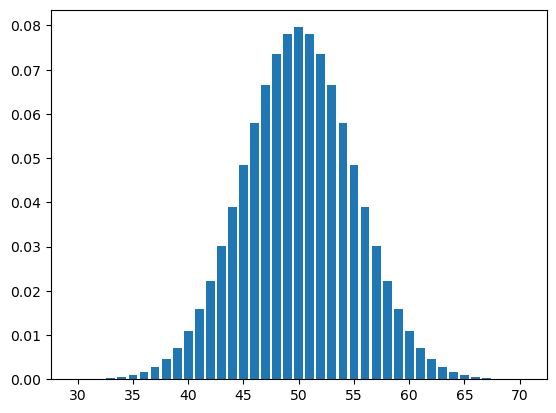

In [3]:
#distribution of number of heads/girls probability 
plt.bar(np.arange(30,71,1), stats.binom.pmf(np.arange(30,71,1), n, p))

In [4]:
#probability of 55 heads/girls or more
1-stats.binom.cdf(m-1, n, p)

0.18410080866334788

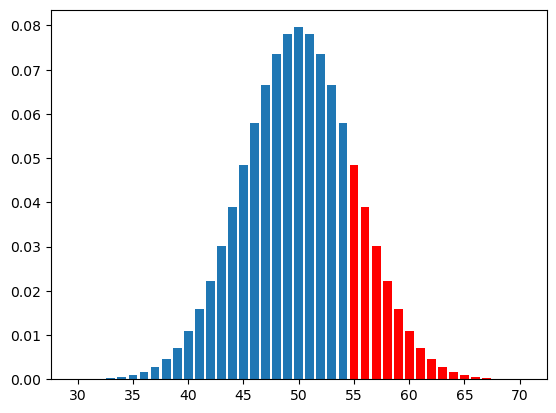

In [5]:
plt.bar(np.arange(30,m,1), stats.binom.pmf(np.arange(30,m,1), n, p))
plt.bar(np.arange(m,71,1), stats.binom.pmf(np.arange(m,71,1), n, p),color='red')
plt.show()

In [6]:
#probability of outcomes as or more unlikely than 55
1-stats.binom.cdf(m-1, n, p)+stats.binom.cdf(n-m, 100, p)

0.36820161732669576

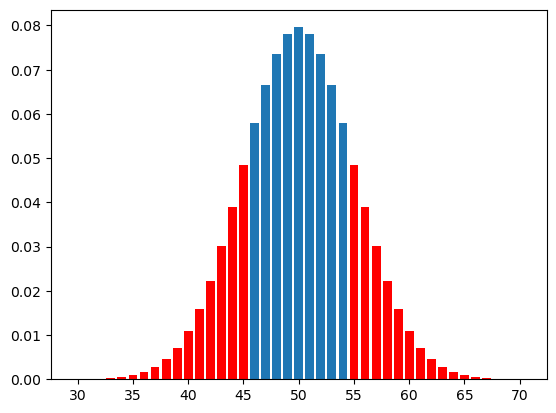

In [7]:
plt.bar(np.arange(n-m+1,m,1), stats.binom.pmf(np.arange(n-m+1,m,1), 100, 0.5))
plt.bar(np.arange(30,100-m+1,1), stats.binom.pmf(np.arange(30,n-m+1,1), 100, 0.5),color='red')
plt.bar(np.arange(m,71,1), stats.binom.pmf(np.arange(m,71,1), n, 0.5),color='red')
plt.show()

In [8]:
#a) we can't reject H0 at any confidence level over 65\%

In [9]:
#b)
n = 1000
m = 550

In [10]:
#probability of outcomes as or more unlikely than 550
1-stats.binom.cdf(m - 1, n, p)+stats.binom.cdf(n - m, n, p)

0.0017305360849763655

In [11]:
#b) we reject H0 at the confidence level 99.8\%
#Notice that it does not prove P(heads/girl)=550/1000=0.55. It only reject the assumption P(heads/girl)=0.5

## Example 2. Height distribution

In [12]:
#upload the data
height = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weight-height.csv')

In [13]:
men_height = height[height.Gender=='Male'] #take only men
women_height = height[height.Gender=='Female'] #take only men
print (len(men_height), len(women_height)) #equal sizes of men/women samples

5000 5000


In [14]:
mu = men_height.Height.mean(); mu #parameters of the men hights distribution

69.02634590621741

In [15]:
sigma = men_height.Height.std(); sigma

2.863362228660651

In [16]:
h1 = women_height.sample(n = 10, random_state = 5000).Height #sample of 10 women hights

In [17]:
h1

5291    63.599373
9071    67.126977
5148    63.954830
8966    64.281735
5978    62.195908
7627    65.009259
9734    68.287640
9808    65.232228
9236    63.347788
7023    63.522955
Name: Height, dtype: float64

In [18]:
h2 = men_height.sample(n = 10, random_state = 5000).Height #sample of 10 men heights

In [19]:
h2

291     71.066906
4071    67.964469
148     66.202348
3966    66.313751
978     67.652945
2627    68.949720
4734    65.001896
4808    69.428557
4236    62.476257
2023    69.435625
Name: Height, dtype: float64

In [20]:
h1.mean()

64.65586930306053

In [21]:
h2.mean()

67.4492474974537

## Z-test

Evaluate the hypothesis 

H0: Sample a) h1, b) h2 follows normal distribution with $\mu=69.02, \sigma=2.86$

or alternative

H1: Sample a) h1, b) h2 does not follow normal distribution with $\mu=69.02, \sigma=2.86$

Note: if samples were larger (ideally size $n\geq 30$ approach below would work for hypothesis without normality assumption, i.e. "H0: Sample follows a distribution with $\mu=69.02, \sigma=2.86$", but for a sample as small as $n=10$, normality assumption is essential for normality of the $Z$ statistics below.

Then under H0, the sample mean $\overline{x}$ should follow $\overline{x}\sim{\cal N}(\mu,\sigma\sqrt{n})$.

Introduce $Z$-statistic for the sample mean $\overline{x}$:
$$
Z=\frac{\overline{x}-\mu}{\sigma\sqrt{n}}
$$


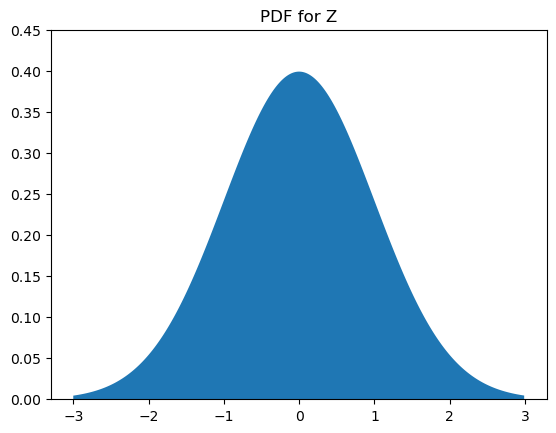

In [22]:
#Z statistic follows a standard normal distribution
x=np.arange(-3,3,0.01)
plt.title('PDF for Z')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.show()

In [23]:
#b) For sample h2

In [24]:
Z2 = (h2.mean() - mu)/sigma*len(h2)**0.5; Z2

-1.7417366954139772

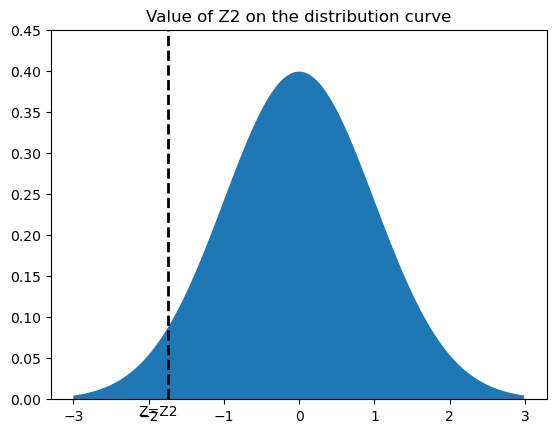

In [25]:
#location of Z2 on the distribution curve
x=np.arange(-3,3,0.01)
plt.title('Value of Z2 on the distribution curve')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.axvline(Z2, color='k', ls='--', lw=2.0)
plt.text(Z2-0.4,-0.02,'Z=Z2')
plt.show()

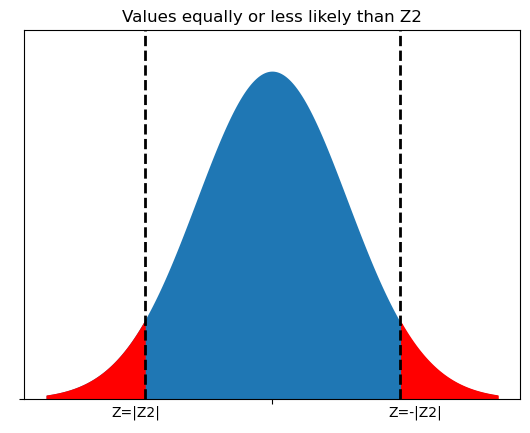

In [26]:
#cumulative probability of the values equally or less likely than Z2
x=np.arange(-3,3,0.01)
plt.title('Values equally or less likely than Z2')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
Z=1.7
plt.fill_between(x[x>Z],stats.norm.pdf(x[x>Z],0,1),color='red')
plt.fill_between(x[x<-Z],stats.norm.pdf(x[x<-Z],0,1),color='red')
plt.axvline(Z, color='k', ls='--', lw=2.0)
plt.axvline(-Z, color='k', ls='--', lw=2.0)
plt.xticks([0], " ")
plt.yticks([0], " ")
plt.text(Z2-0.4,-0.02,'Z=|Z2|')
plt.text(-Z2-0.2,-0.02,'Z=-|Z2|')
#plt.xlabel('Z')
plt.show()

In [27]:
p = 2*stats.norm.cdf(Z2); print('P-value for the Z-test for the sample h2={}'.format(p))

P-value for the Z-test for the sample h2=0.08155452833709122


So we can't reject the hypothesis H0 for the second sample at 95\% significance level. The sample could have been selected from the data on men heights, which was indeed the case as per above

In [28]:
Z1 = (h1.mean() - mu)/sigma*len(h1)**0.5; Z1

-4.826724466822446

In [29]:
2*stats.norm.cdf(Z1)

1.3879693880156966e-06

For the first sample we now can reject the hypothesis H0 at 95\% and even 99.999\% significance level. 
The sample is highly unlikely to represent heights. Indeed it was sampled from women data

## Two-sample t-test

Now assume we do not know anything about the parameters of the underlying distribution (only that it was normal; if samples were larger than $30$ observations we would not even that). Evaluate:

H0: Two samples have the same underlying distribution means

H1: Underlying distribution means for the two sample differ

Use the $t$-statistics:
$$
t=\frac{\overline{x}_2-\overline{x}_1}{s\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
$$
where
$$
s=\sqrt{\frac{\sum (x_1-\overline{x}_1)^2+\sum (x_2-\overline{x}_2)^2}{df}}
$$$$
df = n_1+n_2-2,
$$
and $\overline{x}_1$, $\overline{x}_2$ are sample means, $n_1$, $n_2$ are sample sizes.

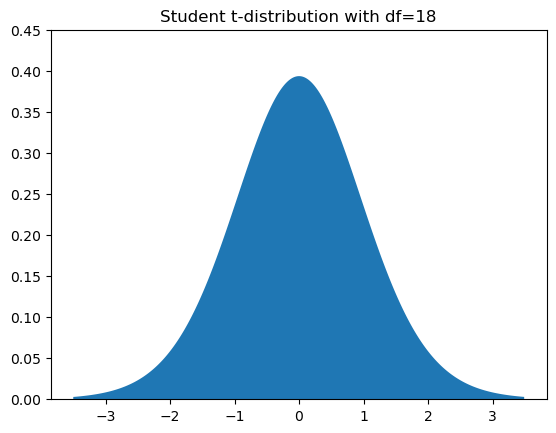

In [30]:
#t-statistics follows a Student t-distribution with df=18 degrees of freedom (similar to standard normal, but not exactly)
x=np.arange(-3.5,3.5,0.01)
df = 18
plt.title('Student t-distribution with df=18')
plt.ylim([0,0.45])
plt.fill_between(x,stats.t.pdf(x,df))
plt.show()

In [31]:
#compute the observed means and also define sample sizes
m1 = h1.mean(); m2 = h2.mean(); n1 = len(h1); n2 = len(h2)

In [32]:
df = n1 + n2 - 2 #degrees of freedom

In [33]:
s = ((((h1 - m1)**2).sum() + ((h2 - m2)**2).sum()) / df) ** 0.5 #estimated joint sample variance

In [34]:
t = (m2 - m1) / s / (n1**-1+n2**-1)**0.5; t #t-statistic

2.8310577658558325

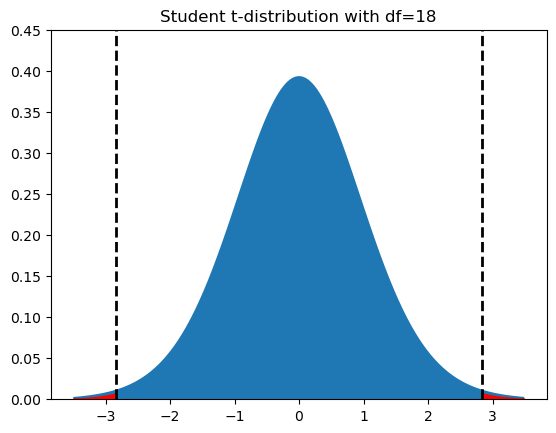

In [35]:
#values of t as or more extreme than observed t
x=np.arange(-3.5,3.5,0.01)
plt.title('Student t-distribution with df=18')
plt.ylim([0,0.45])
plt.fill_between(x,stats.t.pdf(x,df))
plt.fill_between(x[x>t],stats.norm.pdf(x[x>t],0,1),color='red')
plt.fill_between(x[x<-t],stats.norm.pdf(x[x<-t],0,1),color='red')
plt.axvline(t, color='k', ls='--', lw=2.0)
plt.axvline(-t, color='k', ls='--', lw=2.0)
plt.show()

In [36]:
2*stats.t.cdf(-t, df) #p-value (red area above)

0.011073660084596378

In [37]:
stats.ttest_ind(h1,h2) #verify this result with stats t-test function

TtestResult(statistic=-2.8310577658558325, pvalue=0.011073660084596378, df=18.0)

So we can reject H0 with at least 95\% and even 98.8\% confidence

## Kolmogorov-Smirnov test

Test similarity of the empiric cumulative distribution functions $F_1$, $F_2$ for the two samples $h_1$, $h_2$.

Compute the upper bound of the difference between the two cumulative distribution functions:
$$
D=\sup_x|F_1(x)-F_2(x)|
$$

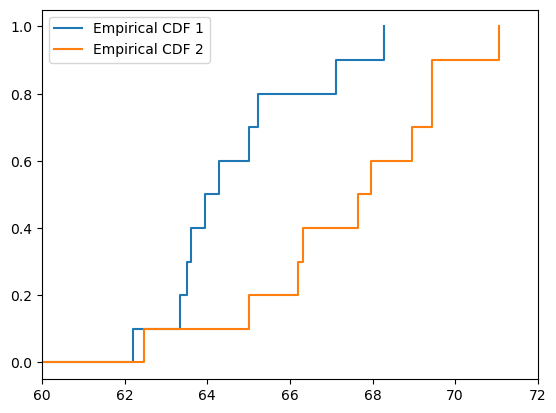

In [38]:
#visualize the distribution functions
plt.step(np.sort(np.concatenate([[60],h1])), np.arange(n1+1, dtype=float)/n1, where='post', label='Empirical CDF 1')
plt.xlim([60,72])
plt.step(np.sort(np.concatenate([[60],h2])), np.arange(n2+1, dtype=float)/n2, where='post', label='Empirical CDF 2')
plt.legend()

We can see $D=0.6$

In [39]:
#K-S test
stats.ks_2samp(h1, h2)

KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=65.2322275232837, statistic_sign=1)

This means we can reject the null hypothesis at the nearly 95\% confidence level, although strictly speaking if we choose the 95% confidence level we won’t be able to reject it as p-value exceeds 5\%.

One may notice a difference in the confidence level provided by the t-test before and Kolmogorov-Smirnov test now. A possible explanation can refer to the fact that the t-test is only valid if the sample means follow a normal distribution, which would be the case either for large sample sizes or if the underlying distributions were normal. Since the sample sizes are relatively small, in order to apply t-test we effectively have to rely on our knowledge of the normality of the underlying distribution, which is not used by the Kolmogorov-Smirnov test. This is why having less information about the small samples it can’t be that definitive in rejecting the null hypothesis.

One can also use a one-sample version of the K-S test to test if a given sample follows a given theoretic distribution. Try it for the entire data sample

In [40]:
stats.kstest(men_height.Height, 'norm', args=(mu,sigma))

KstestResult(statistic=0.010760792467098962, pvalue=0.6049196596035382, statistic_location=67.0711894162546, statistic_sign=-1)

As p-value is pretty high we can't reject hypothesis that the distribution is normal with observed mean and std values; this actually looks pretty likely